<a href="https://colab.research.google.com/github/kavyajeetbora/modern_geospatial_stack/blob/master/notebooks/02_download_metro_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 1.8 MB/s eta 0:00:00


In [2]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
from tqdm import tqdm

## Download OSM Data

In [3]:
## Note: the coordinates are in West, South, East, North format

bboxs = {
    'Mumbai': (72.7712628039,18.8895552464,73.0912396106,19.322318006),
    'Hyderabad': (78.2288393192,17.1952635128,78.692325037,17.6244114807),
    'Bangalore': (77.4480254838,12.815481916,77.7549560258,13.1026335949),
    'Chennai': (80.0337033915,12.8678089117,80.335827415,13.2370438819),
    'Kolkata': (88.2431406976,22.4883995072,88.4944529534,22.7071046611),
    'Ahmedabad': (72.4617185823,22.9179551449,72.699297928,23.1470216925),
    'Dehli_NCR': (76.881197,28.31444,77.604922,28.893765)
}

In [4]:
%%time
# city = 'Dehli_NCR'
metro_stops = []
metro_lines = []

for city, bbox in tqdm(bboxs.items(), unit=' cities'):

    ## Download OSM data
    W,S,E,N = bboxs[city]
    public_transport = ox.features.features_from_bbox(bbox=(N,S,E,W), tags={'subway':True, 'public_transport': 'station', 'railway':'subway'}).reset_index()
    print("Length of the dataframe" , public_transport.shape[0])

    ## Extract Metro Stops
    stops = public_transport.loc[(public_transport['element_type']=='node') & (public_transport['subway']=='yes') & (public_transport['public_transport']=='station')]
    print(f"Number of stations: {stops.shape[0]} in {city}")

    ## Extract Metro Lines
    lines = public_transport.loc[(public_transport['railway']=='subway') & (public_transport['name'].notna())]
    print(f"Number of lines: {lines.shape[0]} in {city}")

    metro_lines.append(lines)
    metro_stops.append(stops)

 14%|█▍        | 1/7 [00:03<00:22,  3.67s/ cities]

Length of the dataframe 590
Number of stations: 33 in Mumbai
Number of lines: 79 in Mumbai


 29%|██▊       | 2/7 [00:07<00:18,  3.73s/ cities]

Length of the dataframe 532
Number of stations: 52 in Hyderabad
Number of lines: 164 in Hyderabad


 43%|████▎     | 3/7 [00:11<00:15,  3.88s/ cities]

Length of the dataframe 739
Number of stations: 64 in Bangalore
Number of lines: 188 in Bangalore


 57%|█████▋    | 4/7 [00:14<00:10,  3.65s/ cities]

Length of the dataframe 419
Number of stations: 42 in Chennai
Number of lines: 44 in Chennai


 71%|███████▏  | 5/7 [00:18<00:07,  3.52s/ cities]

Length of the dataframe 368
Number of stations: 39 in Kolkata
Number of lines: 50 in Kolkata


 86%|████████▌ | 6/7 [00:20<00:03,  3.30s/ cities]

Length of the dataframe 229
Number of stations: 3 in Ahmedabad
Number of lines: 29 in Ahmedabad


100%|██████████| 7/7 [00:32<00:00,  4.71s/ cities]

Length of the dataframe 2999
Number of stations: 261 in Dehli_NCR
Number of lines: 477 in Dehli_NCR
CPU times: user 4.82 s, sys: 133 ms, total: 4.95 s
Wall time: 33 s


In [7]:
pd.concat("")

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


,element_type,osmid,internet_access,name,name:hi,name:mr,network,operator,public_transport,railway,...,amenity_1,service,not:network:wikidata,elevation,surface,aerialway,internet_access:fee,bicycle,tunnel,addr:housenumber
135,node,5219622342,NaN,Dahanukarwadi,NaN,डहाणूकरवाडी,NaN,NaN,station,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,node,5219622343,NaN,Kandivali West,NaN,कांदिवली पश्चिम,NaN,NaN,station,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,node,5219622344,NaN,Borivali West,NaN,बोरिवली पश्चिम,NaN,NaN,station,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,node,5219622345,NaN,Mandapeshwar,NaN,मंडपेश्वर,NaN,NaN,station,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,node,5219622346,NaN,Kandarpada,NaN,कांदरपाडा,NaN,NaN,station,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,node,5219622347,NaN,Anand Nagar (Dahisar),NaN,आनंद नगर (दहिसर),NaN,NaN,station,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,node,5219623032,NaN,Shimpoli,NaN,शिंपोली,NaN,NaN,station,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,node,5219623047,NaN,Eksar,NaN,एकसर,NaN,NaN,station,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,node,6020955334,NaN,Andheri,NaN,अंधेरी,NaN,NaN,station,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,node,9627118208,NaN,Dahisar (East) [Line 7],NaN,दहिसर (पूर्व),NaN,NaN,station,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of stations: 261


<Axes: >

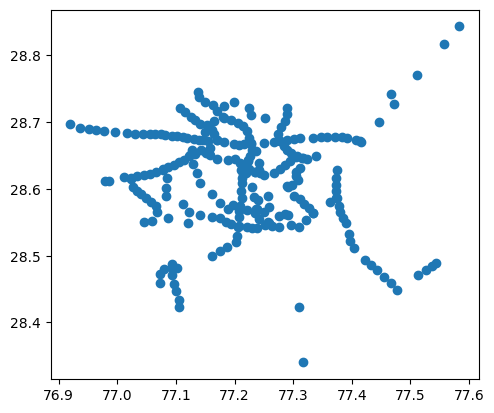

In [ ]:
metro_stops = public_transport.loc[(public_transport['element_type']=='node') & (public_transport['subway']=='yes') & (public_transport['public_transport']=='station')]
print(f"Number of stations: {metro_stops.shape[0]}")
metro_stops.plot()

In [ ]:
bus_stops = ox.features.features_from_bbox(bbox=(N,S,E,W), tags={'public_transport': 'station'}).reset_index()
bus_stops[bus_stops['subway']!='yes'].to_csv('bus_stops.csv')

Number of lines: 477


<Axes: >

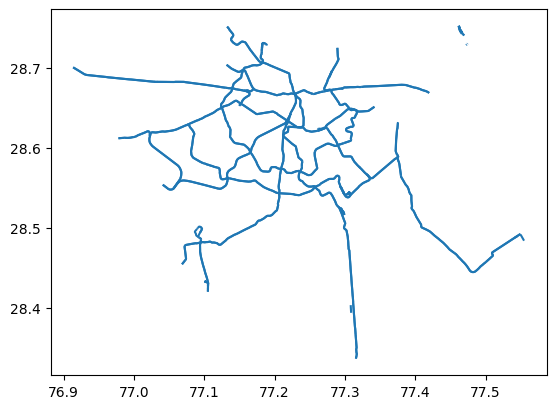

In [ ]:
metro_lines = public_transport.loc[(public_transport['railway']=='subway') & (public_transport['name'].notna())]
print(f"Number of lines: {metro_lines.shape[0]}")
metro_lines.plot()

In [ ]:
metro_lines.to_parquet(f'{}_metro_lines.parquet')
metro_stops.to_parquet(f'{}_metro_stops.parquet')